# Stock Prediction using RNNs

In this notebook, we try to predict tomorrow's price of an asset (say, TSLA's stock price) from the open price from the last 50 days, using simple recurrent neural networks (RNNs) 

![image](_static/StockPrediction_RNNs.png)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

2023-08-15 12:53:05.543746: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-15 12:53:05.563268: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-15 12:53:05.710175: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-15 12:53:05.710944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 12:53:06.562591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
data = pd.read_csv('datasets/Tesla.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
time_step = 50
length_data = len(data) - time_step
split_ratio = 0.7
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1642
Train data length : 1149
Validation data lenth : 493


In [4]:
data = data.loc[:,['Date', 'Open']]
data['Date'] = pd.to_datetime(data['Date'])
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data[['Open']][time_step:length_train+time_step].values)
scaled_data = scaler.transform(data[['Open']].values)

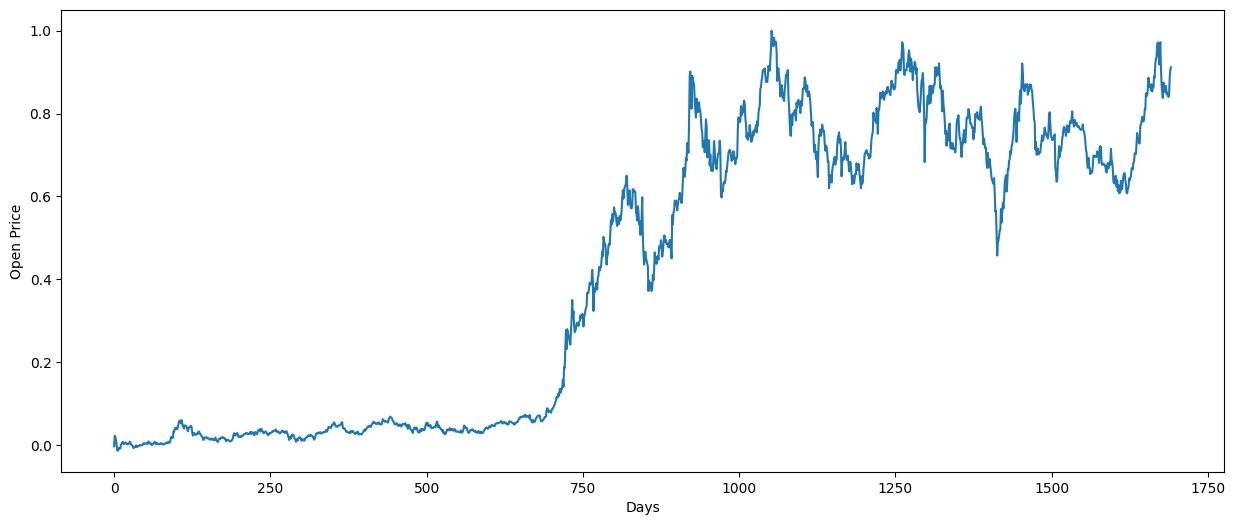

In [5]:
plt.subplots(figsize = (15,6))
plt.plot(scaled_data)
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.show()

In [6]:
X_train, X_test = [], []
y_train, y_test = [], []


for i in range(time_step, len(scaled_data)):
    if i < length_train+time_step:
        X_train.append(scaled_data[i-time_step:i,0])
        y_train.append(scaled_data[i,0])
    else:
        X_test.append(scaled_data[i-time_step:i, 0])
        y_test.append(scaled_data[i,0])
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

In [7]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"])

history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 2s 17ms/step - loss: 0.3805 - accuracy: 8.7032e-04
Epoch 2/50
36/36 [==============================] - 1s 16ms/step - loss: 0.1990 - accuracy: 0.0017
Epoch 3/50
36/36 [==============================] - 1s 16ms/step - loss: 0.1327 - accuracy: 0.0017
Epoch 4/50
36/36 [==============================] - 1s 16ms/step - loss: 0.0881 - accuracy: 0.0017
Epoch 5/50
36/36 [==============================] - 1s 16ms/step - loss: 0.0657 - accuracy: 0.0017
Epoch 6/50
36/36 [==============================] - 1s 15ms/step - loss: 0.0505 - accuracy: 0.0017
Epoch 7/50
36/36 [==============================] - 1s 16ms/step - loss: 0.0433 - accuracy: 0.0017
Epoch 8/50
36/36 [==============================] - 1s 16ms/step - loss: 0.0371 - accuracy: 0.0017
Epoch 9/50
36/36 [==============================] - 1s 16ms/step - loss: 0.0325 - accuracy: 0.0017
Epoch 10/50
36/36 [==============================] - 1s 16ms/step - loss: 0.0277 - accuracy: 0.0017
Epoch

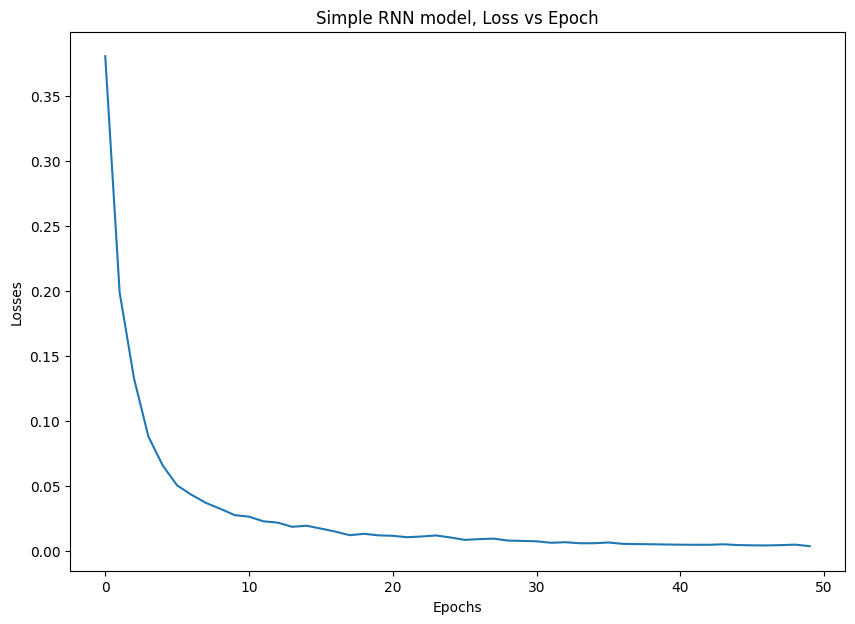

In [8]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

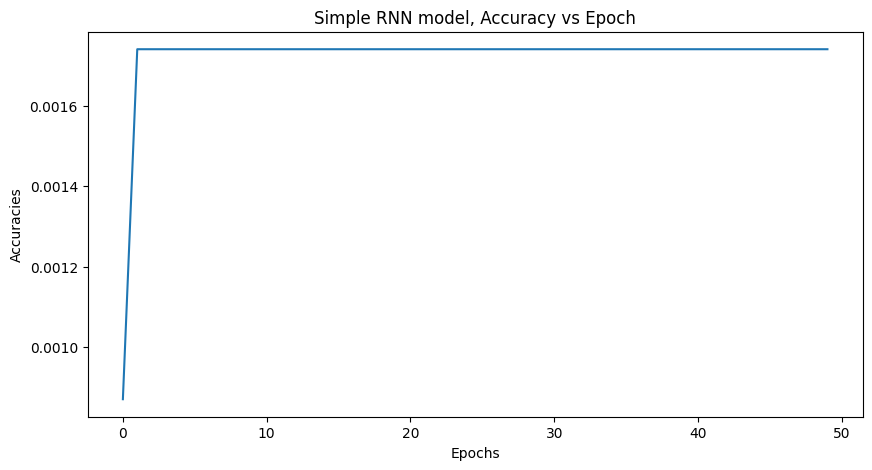

In [9]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [10]:
y_pred = regressor.predict(X_train)  
y_pred = scaler.inverse_transform(y_pred) 
y_train = scaler.inverse_transform(y_train) 

36/36 [==============================] - 0s 5ms/step


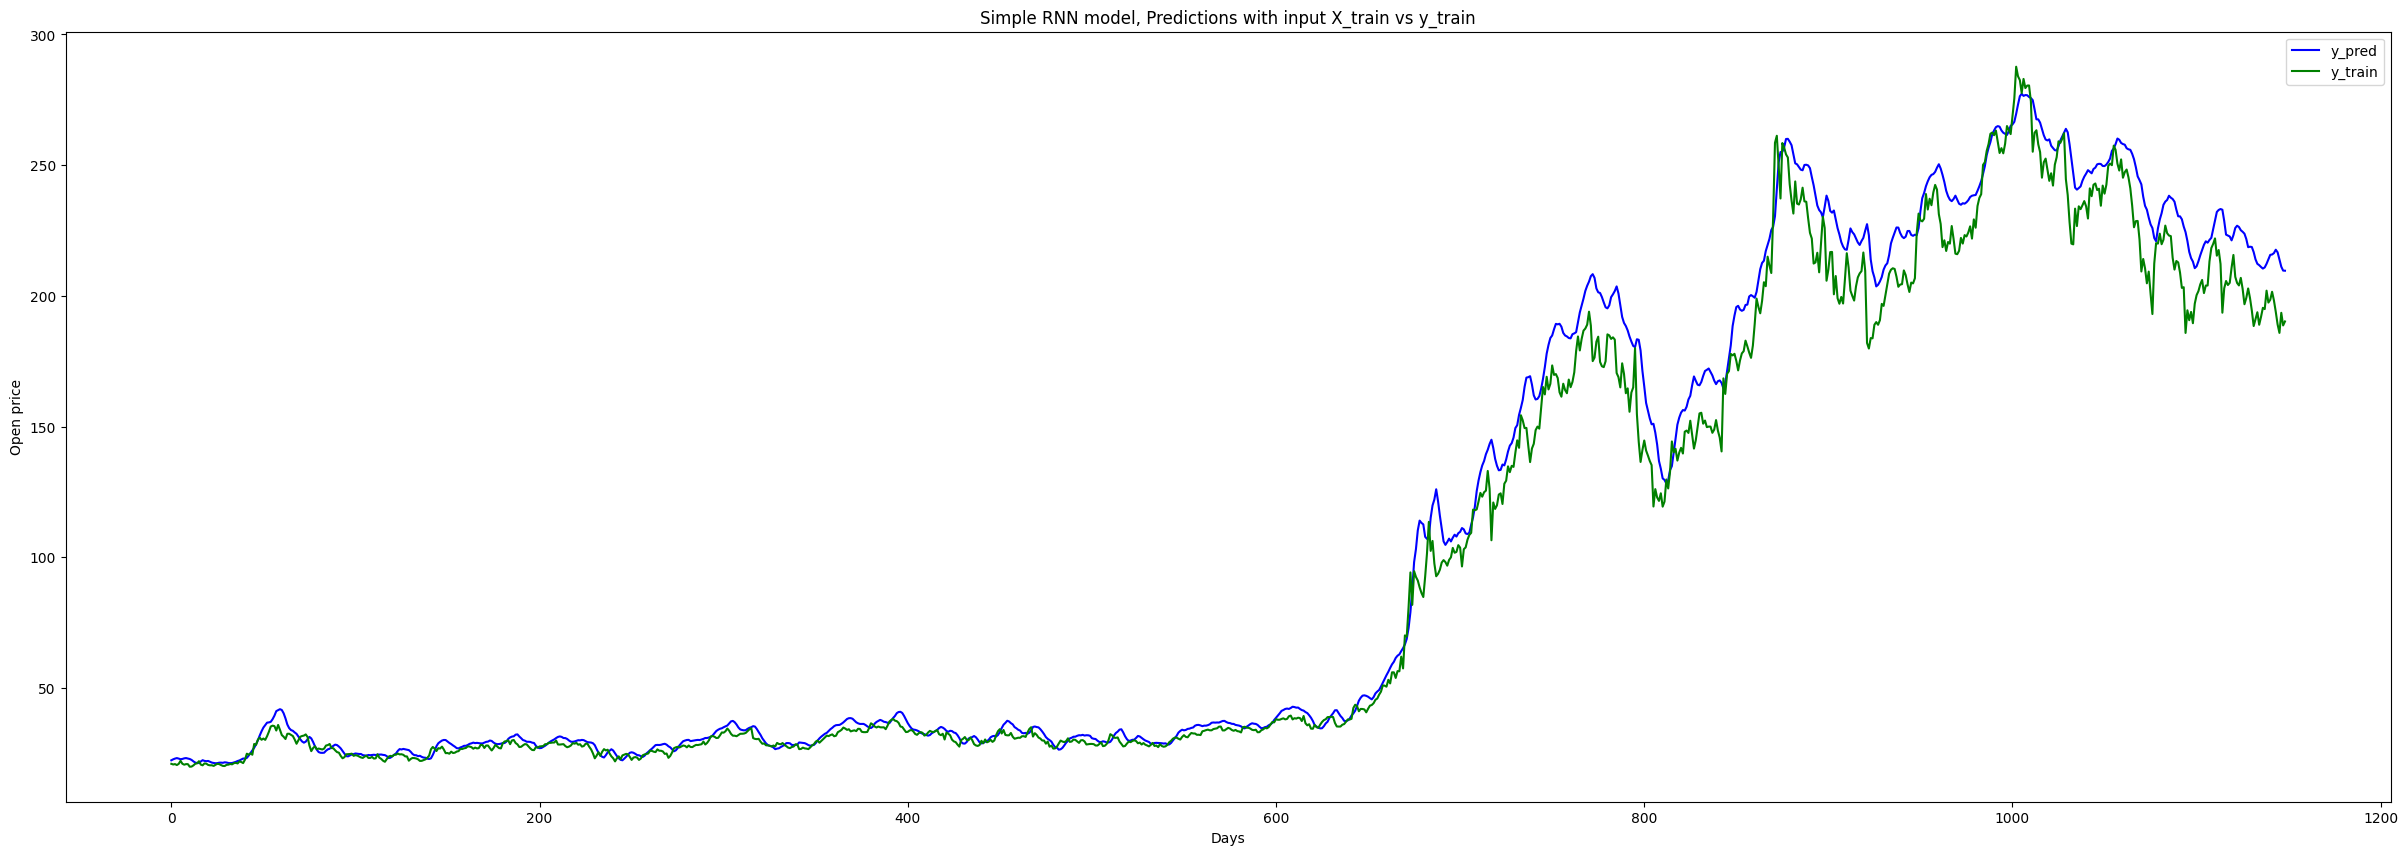

In [11]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


In [12]:
y_pred_of_test = regressor.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
y_test = scaler.inverse_transform(y_test)

16/16 [==============================] - 0s 5ms/step


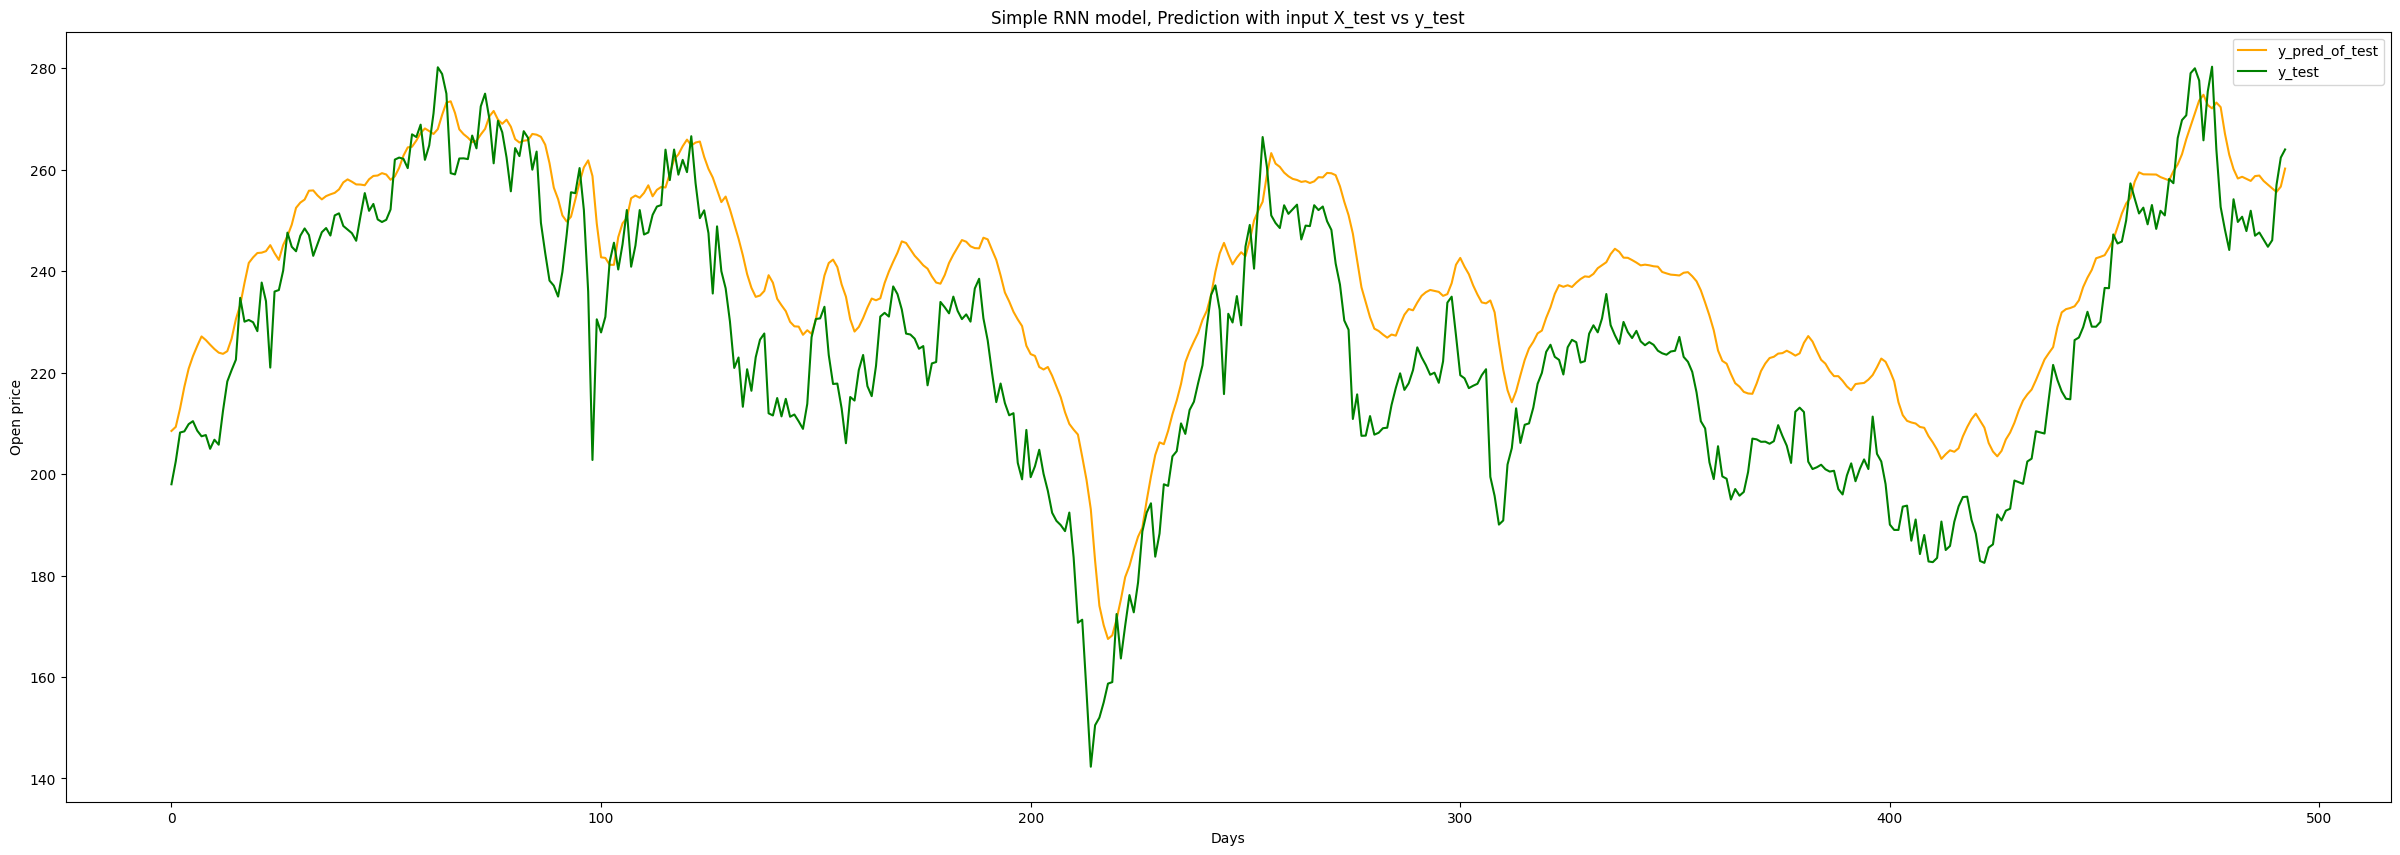

In [13]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(y_test, label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

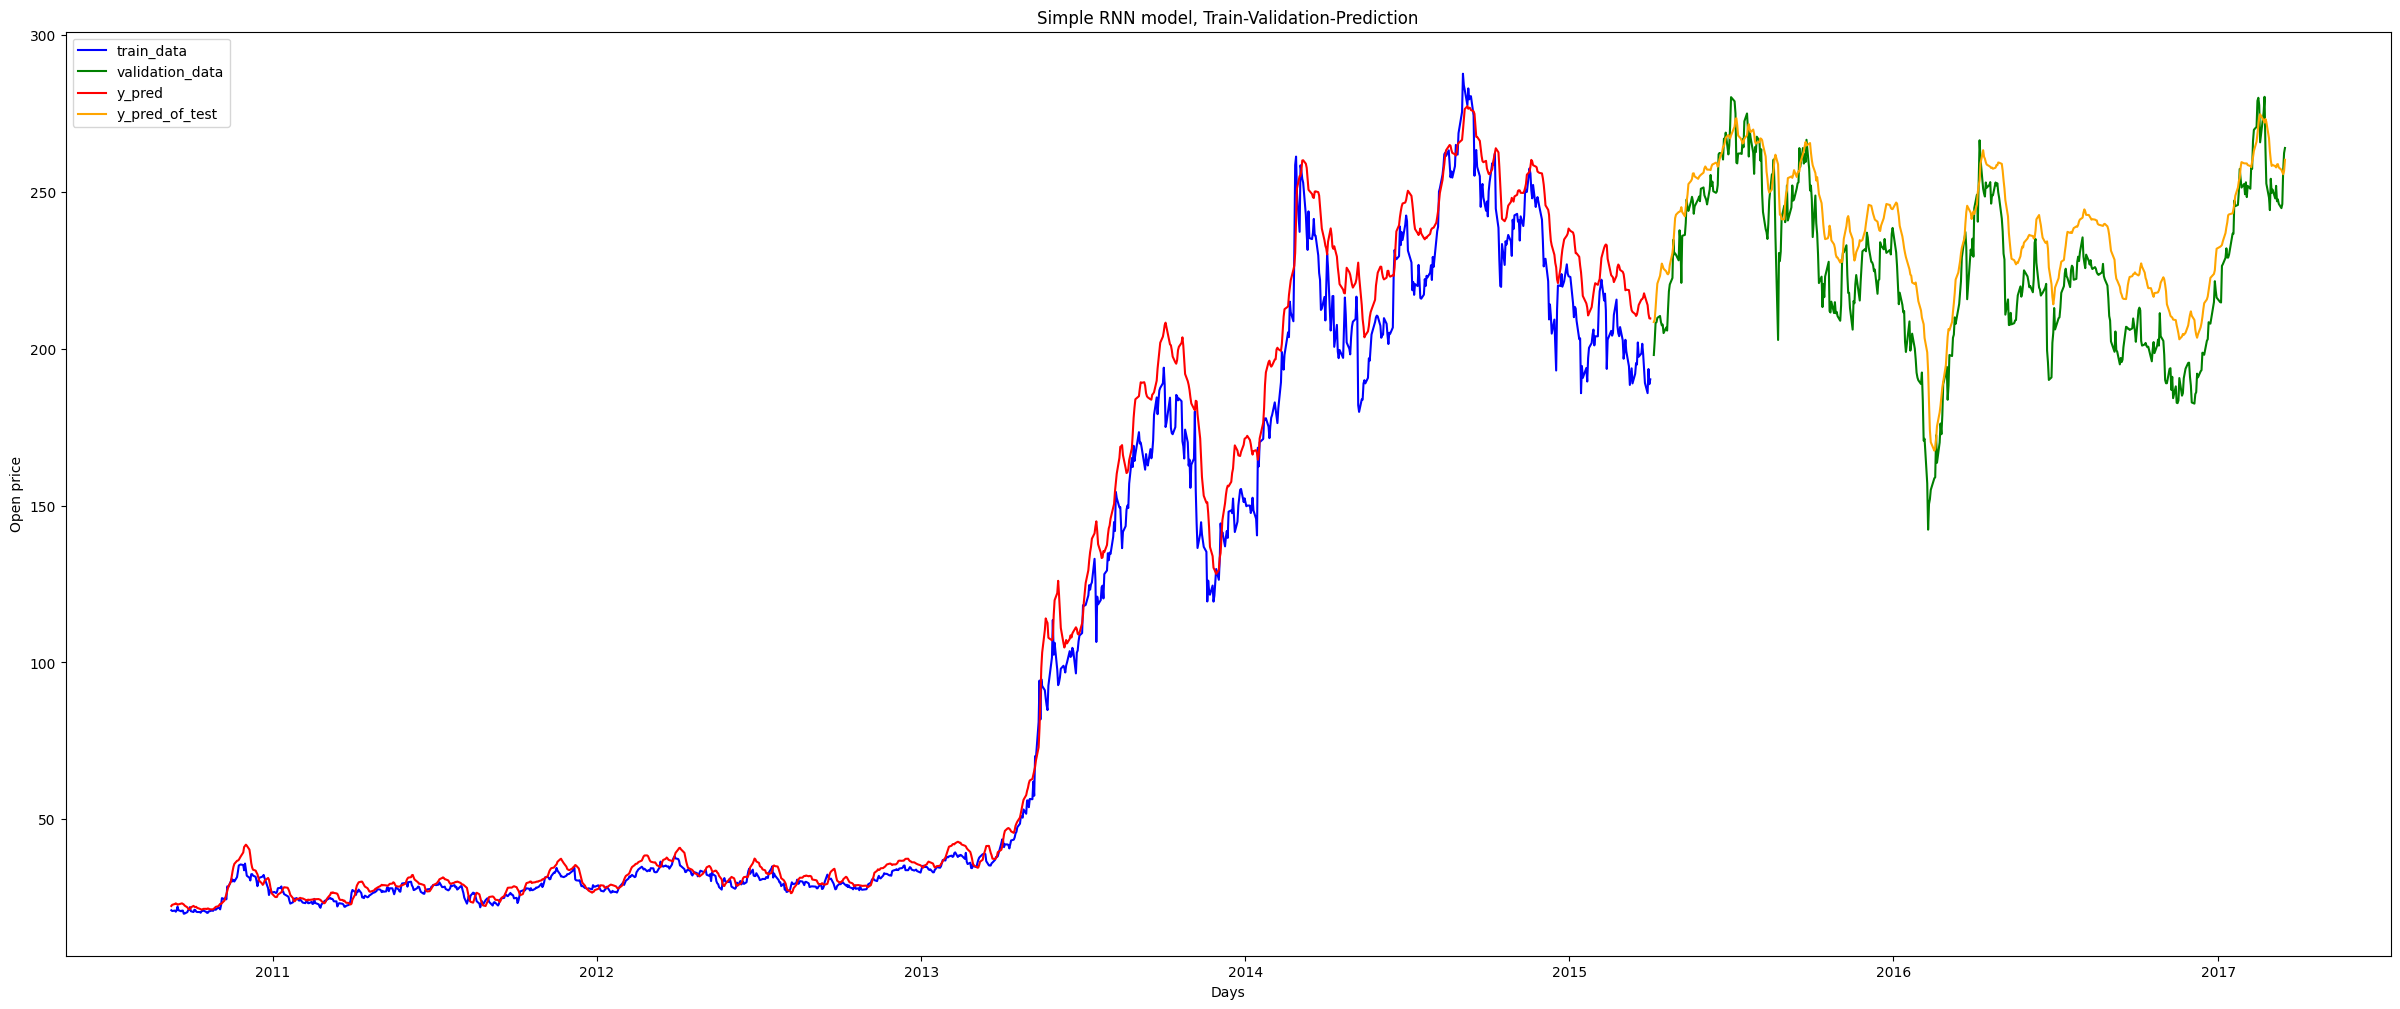

In [14]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(data.Date[time_step:length_train+time_step], y_train, label = "train_data", color = "b")
plt.plot(data.Date[length_train+time_step:], y_test, label = "validation_data", color = "g")
plt.plot(data.Date[time_step:length_train+time_step], y_pred, label = "y_pred", color = "r")
plt.plot(data.Date[length_train+time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
# plt.savefig('_static/StockPrediction_RNNs.png')
plt.show()